# RESEARCH ON MOVIES: BUDGET, GENDER DIVERSITY AND PUBLISHED ERA - WHAT DETERMINE A FILM’S GROSS PROFIT?

*Group Member: Huy Pham, Hao Jiang, Kerie Galvez, Steven Tsai*

## Project Proposal

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(cowplot)
library(dplyr)
library(GGally)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## 1 Background

Despite the increasing attention to lack of diversity in Hollywood, women has traditionally and continued to be underrepresented in movies (Citation). A very popular method used to gauge women’s involvement in movies is the Bechdel test. In order to pass the Bechdel test, a movie needs: 1) at least two women, 2) talk to each other and 3) conversation topic in 2) must be something other than a man (Citation). Simple enough, but shockingly 40% of movies in 2018 failed this test (Citation)

We suspect this is due to lack of awareness of the association between women’s involvement and films’ success among film producers. To confirm if there is a statistical association between the two, we will carry out a MLR model with response variable being a movie’s gross income and independent variables being the Bechdel test, budget, and published era (period code).


We suspect this is due to lack of awareness of the association between women’s involvement and films’ success among film producers. To confirm if there is a statistical association between the two, we will carry out a MLR model with response variable being a movie’s gross income and independent variables being the Bechdel test, budget, and published era.


## 2 Dataset Description

The dataset is a compilation of 1615 movies released from 1990 to 2013.. Each observation includes important information on the post including the following variables of interest for this report:

- imdb: The IMDb number is the identification of the movie on IMDb - which stands for "Internet Movie Database" and is the largest collection of information relating to films, television shows, actors and production crew available on the Internet.
- binary: Determine whether a movie passes Bechdel test. If the result in 'clean_test' column is "ok", then the according value in 'binary' column is PASS. For all other values in 'clean_test', the according value in 'binary' is FAIL.
- budget: The budget spent on the movie, in nominal dollar value of the year that it was released.
- domgross: The domestic revenue of the movie, in nominal dollar value of the year that it was released.
- intgross: The international revenue of the movie, in nominal dollar value of the year that it was released.
- period code: Number to indicate a movie's period based on its release year. If it's released from 2010-2013, the period code is 1. If it's released from 2005-2009, the period code is 2. If it's released from 2000-2004, the period code is 3. If it's released from 1995-1999, the period code is 4. If it's released from 1990-1994, the period code is 5. If it's released before 1990, there is no value.


## 3 Preliminary Results

### Cleaning and Wrangling of Data

In [2]:
download.file("https://github.com/fivethirtyeight/data/raw/master/bechdel/movies.csv", destfile = "movies.csv")
movie_data <- read.csv("movies.csv")
head(movie_data)


,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013.,domgross_2013.,intgross_2013.,period.code,decade.code
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
1,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380,42195766,2013FAIL,13000000,25682380,42195766,1,1
2,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714,40868994,2012PASS,45658735,13611086,41467257,1,1
3,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035,158607035,2013FAIL,20000000,53107035,158607035,1,1
4,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460,132493015,2013FAIL,61000000,75612460,132493015,1,1
5,2013,tt0453562,42,men,men,FAIL,40000000,95020213,95020213,2013FAIL,40000000,95020213,95020213,1,1
6,2013,tt1335975,47 Ronin,men,men,FAIL,225000000,38362475,145803842,2013FAIL,225000000,38362475,145803842,1,1


Since the year, budget, domgross, intgross, decadeCode are the variables that we interested, we need to consider the null value between them. Also, the domgross and the intgross should be integer rather than the chr type, so we use the as.intger to transfer them.

In [3]:
clean_movie_data <- movie_data %>%
                    mutate(domgross = as.integer(domgross),
                           intgross = as.integer(intgross),
                           decadeCode = decade.code,
                           periodCode = period.code) %>%
                    filter(!is.na(year&budget&domgross&intgross&periodCode&decadeCode)) %>%
                    mutate(tot_gross = domgross + intgross) %>%
                    # mutate(binary = as_factor(binary),
                    #        domgross = as_factor(domgross),
                    #        intgross = as_factor(intgross),
                    #        tot_gross = as_factor(tot_gross),
                    #        decadeCode = as_factor(decadeCode),) %>%
                    select(year,imdb,budget,binary,domgross,intgross,periodCode,decadeCode)
head(clean_movie_data)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion to integer range”


,year,imdb,budget,binary,domgross,intgross,periodCode,decadeCode
,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,2013,tt1711425,13000000,FAIL,25682380,42195766,1,1
2,2012,tt1343727,45000000,PASS,13414714,40868994,1,1
3,2013,tt2024544,20000000,FAIL,53107035,158607035,1,1
4,2013,tt1272878,61000000,FAIL,75612460,132493015,1,1
5,2013,tt0453562,40000000,FAIL,95020213,95020213,1,1
6,2013,tt1335975,225000000,FAIL,38362475,145803842,1,1


### Associations Discovery

We explore the association between all the variables 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



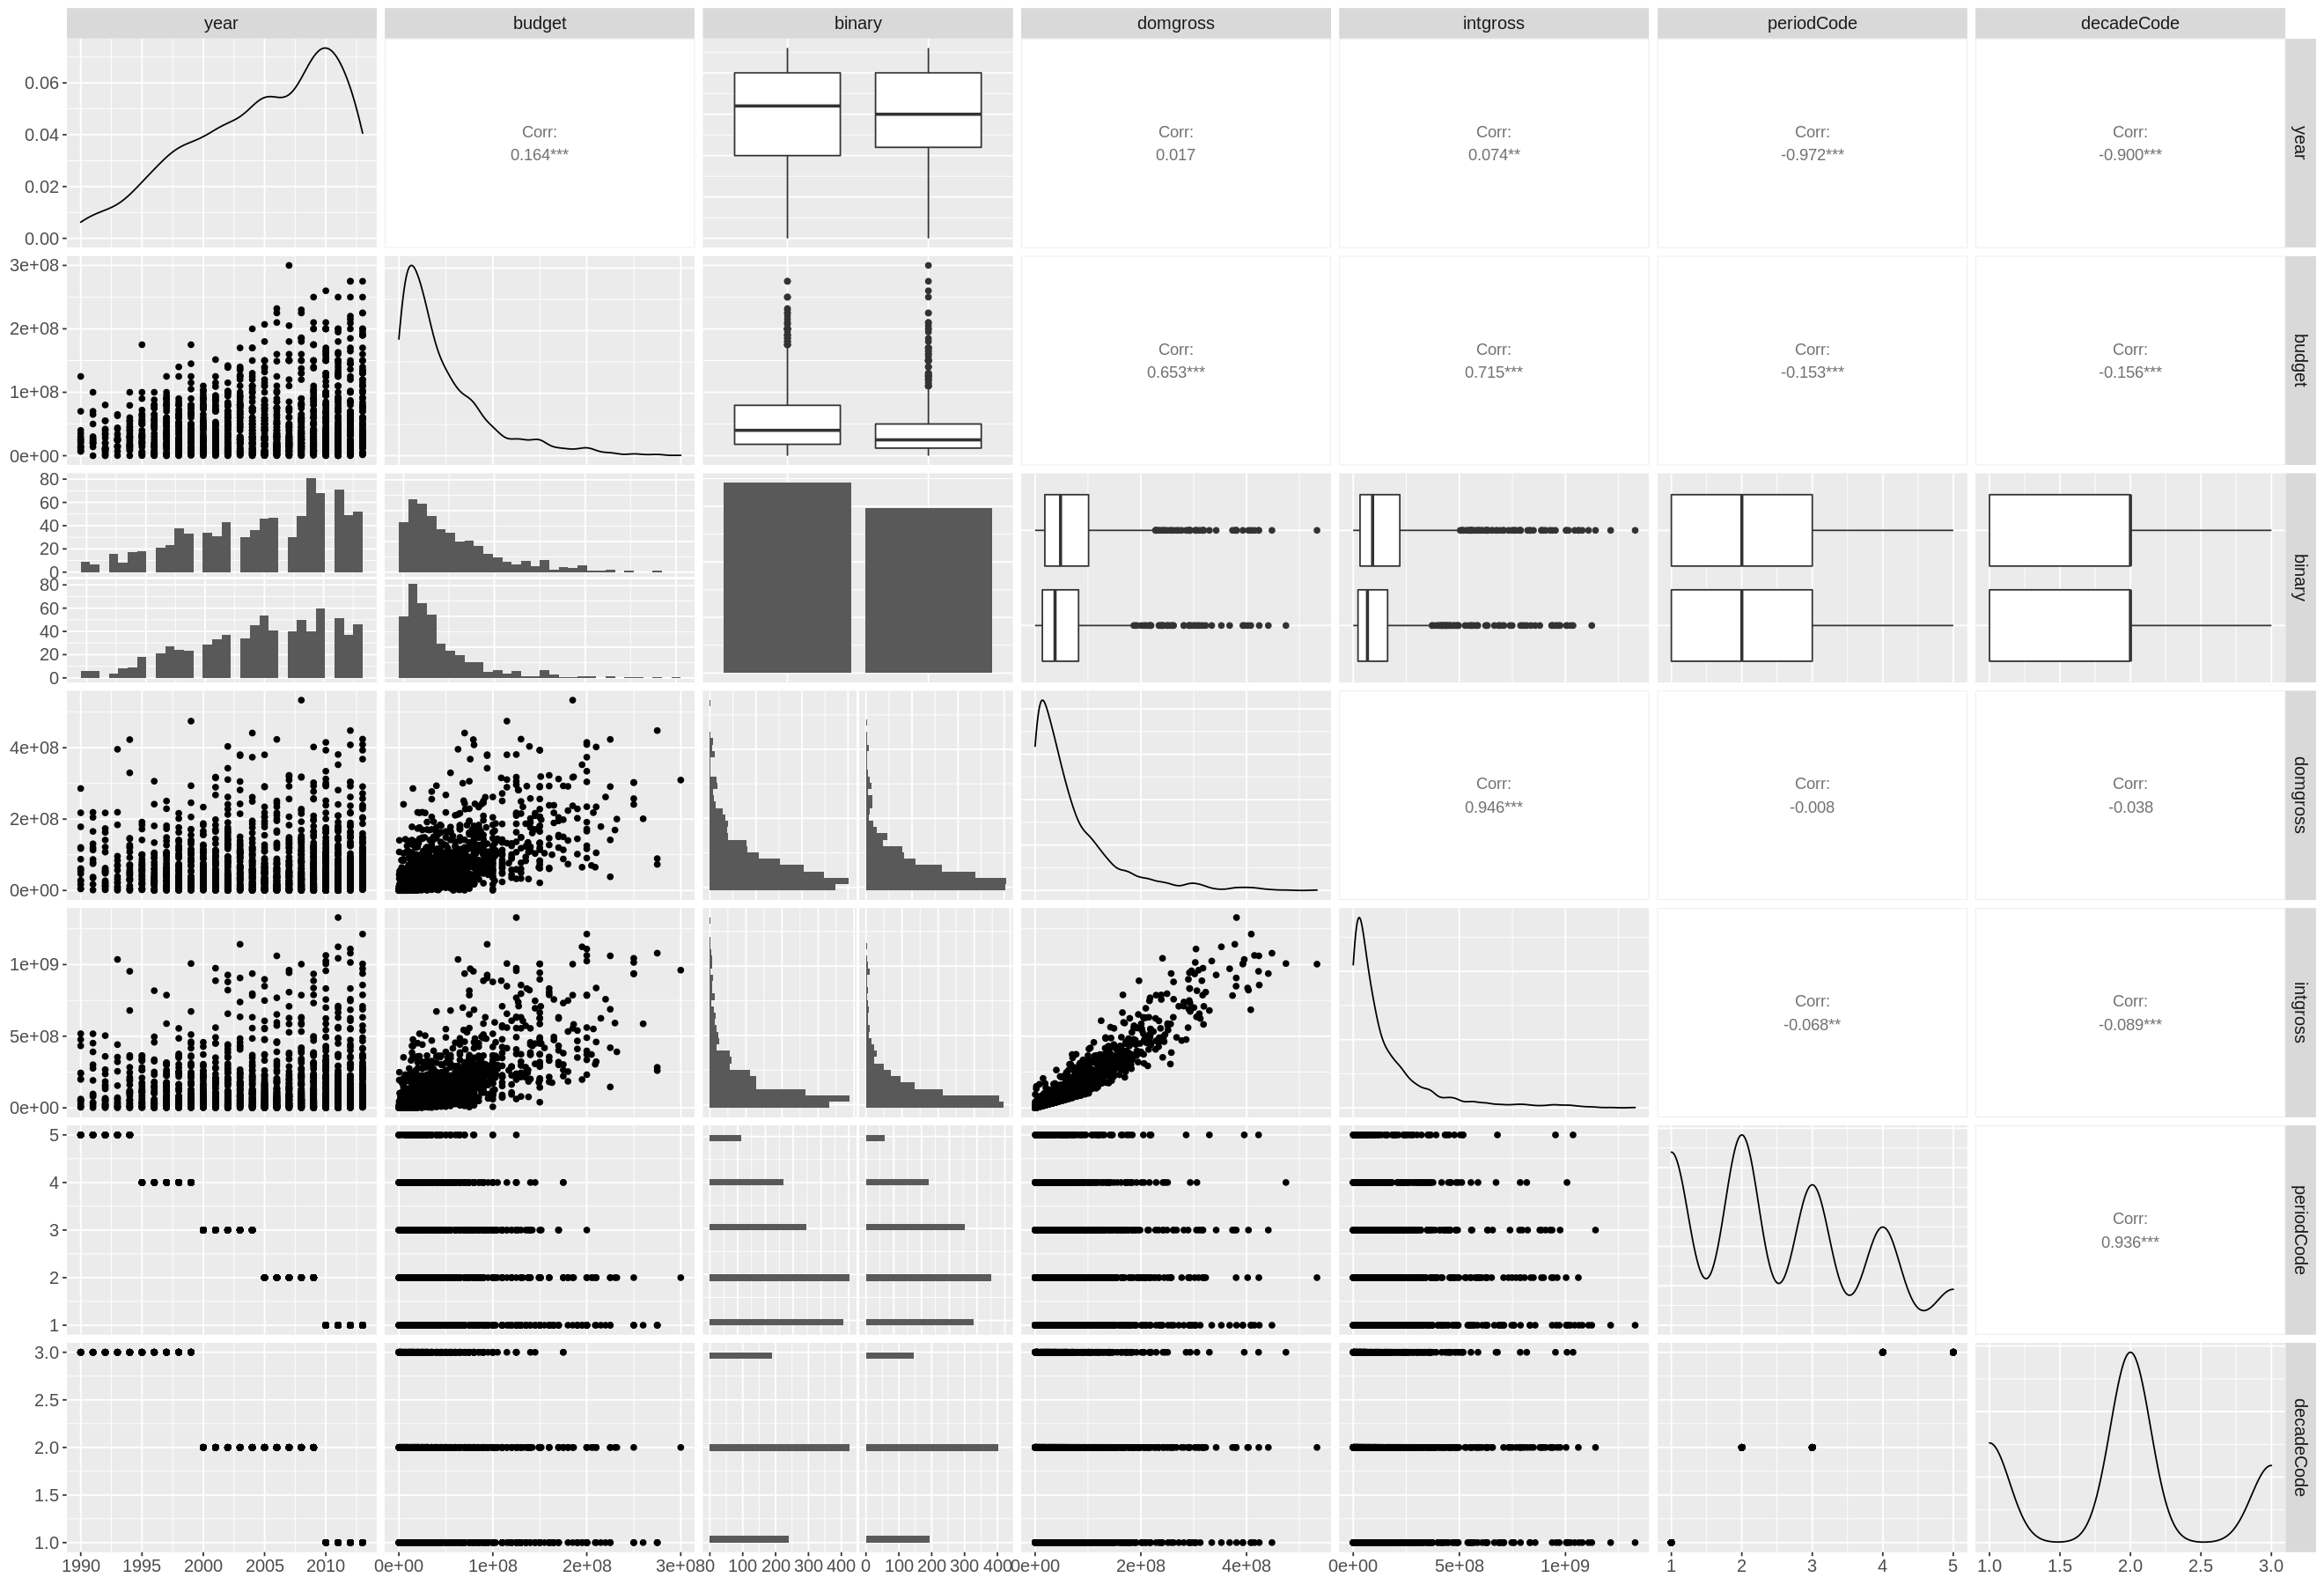

In [32]:
options(repr.plot.width = 22, repr.plot.height = 15)
#using ggpair()
Movies_pair_plots <- clean_movie_data %>%
  select(- imdb) %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
Movies_pair_plots

*Fig1 Associations bewtween variables*

> From Figure 1, we can find that domestic income of movies is moderately correlated with budget and highly correlated with international revenue, but almost weakly correlated with other variables.

Next, we will use a heatmap to visualize the pairwise correlation coefficients between all continuous(input) variables.

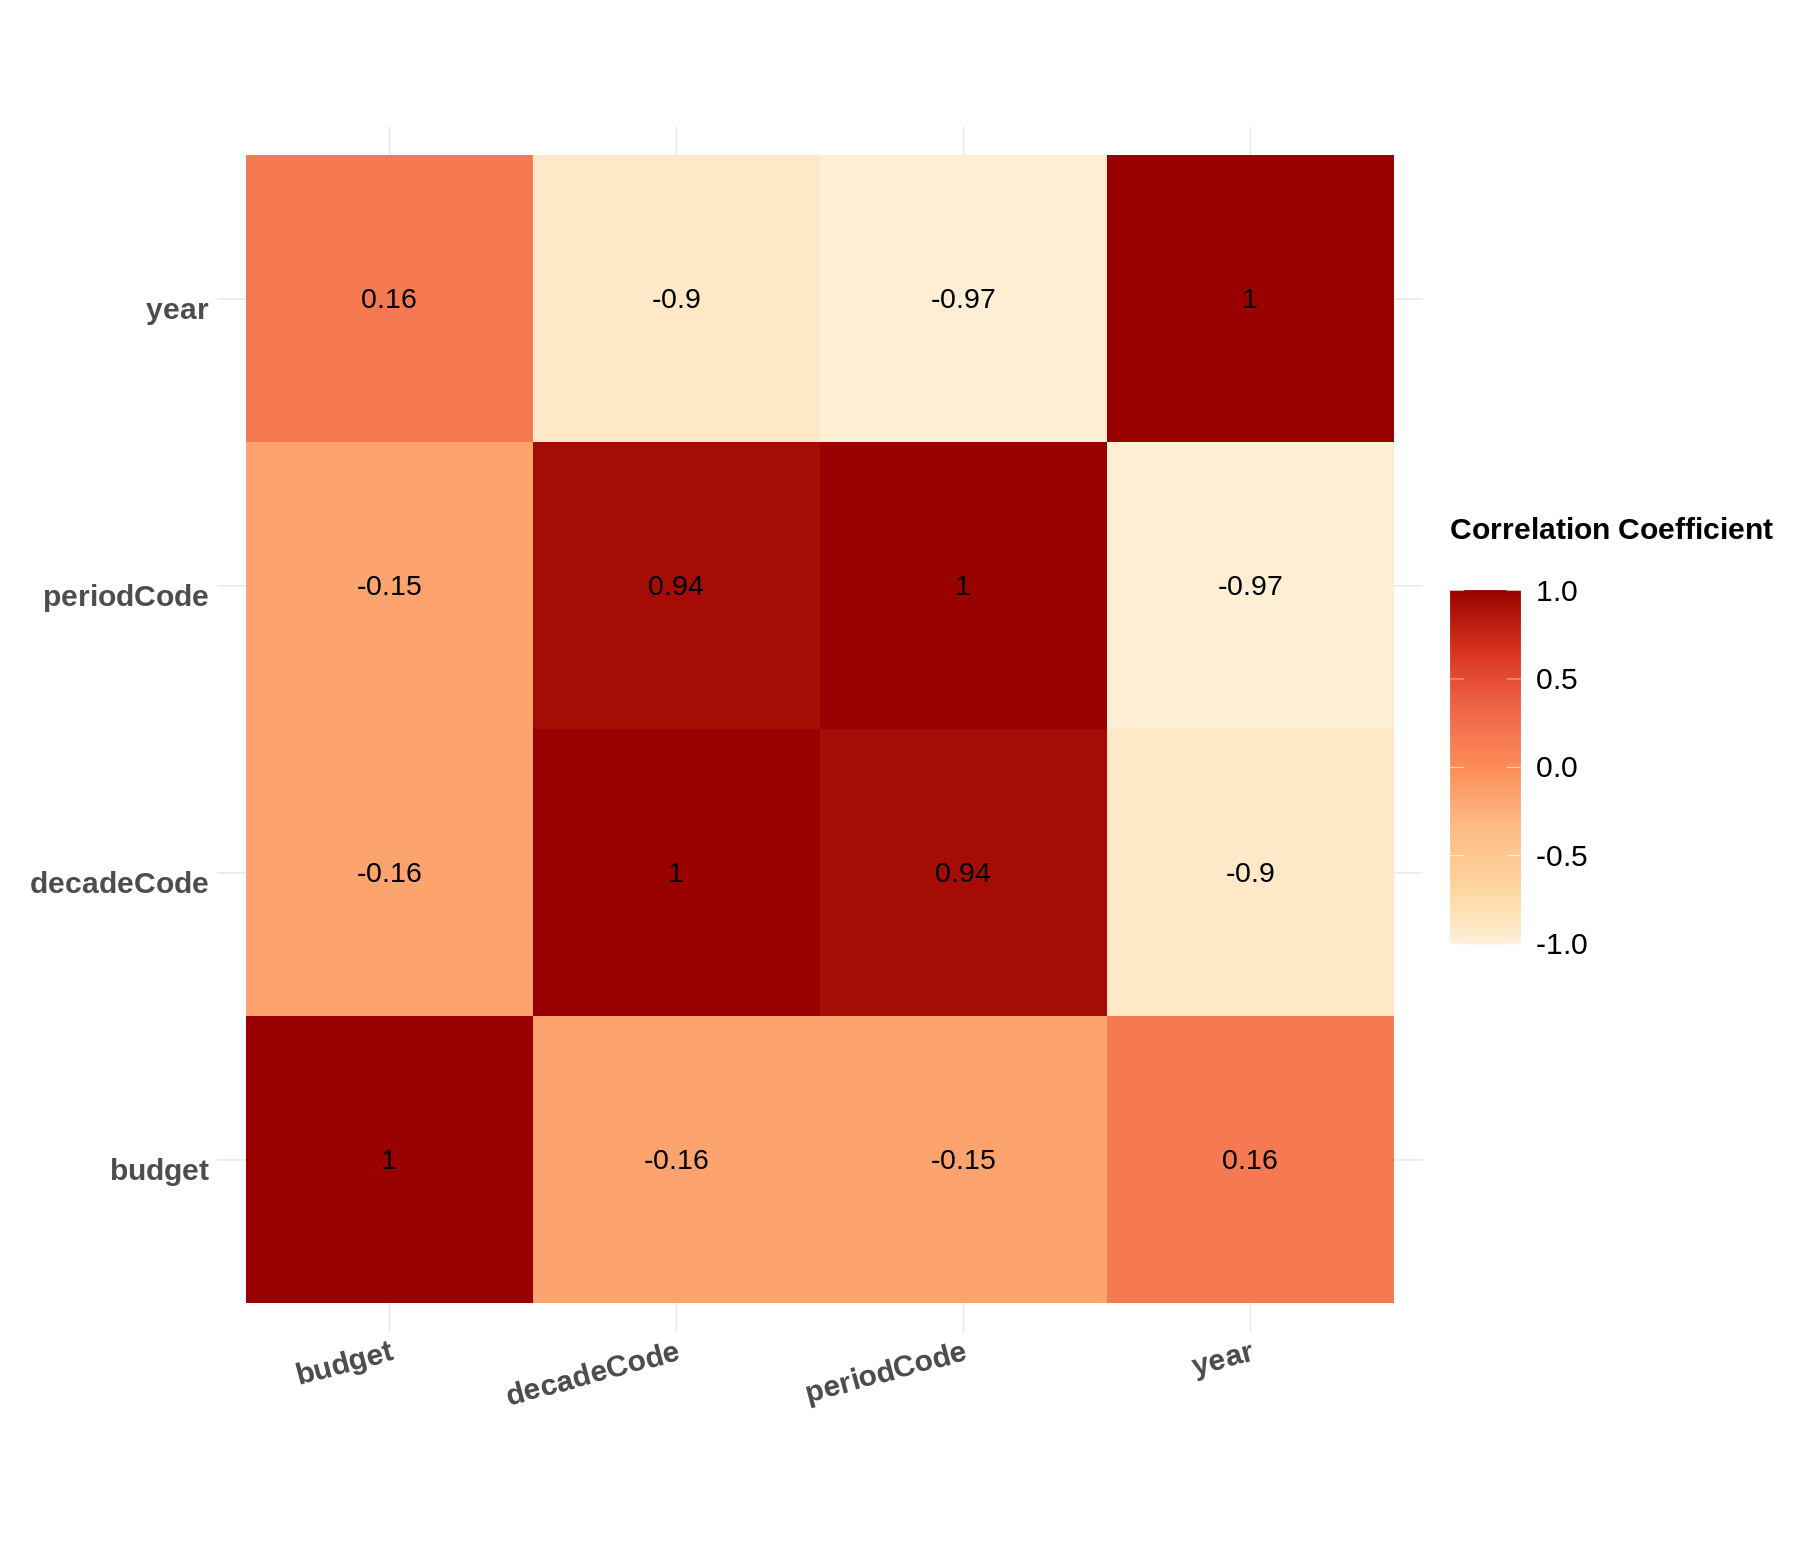

In [29]:
options(repr.plot.width = 15, repr.plot.height = 13)
corr_matrix_movies <- clean_movie_data %>%
  select(- c(imdb,domgross,binary,intgross)) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")


plot_corr_matrix_movies <- corr_matrix_movies %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr)) +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "OrRd",
    direction = 1, limits = c(-1,1)) +
  labs(x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(
      angle = 15, vjust = 1,
      size = 18, hjust = 1,
      face = "bold"),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1,
      face = "bold"
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(1.5, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr,digits =2)), color = "black", size = 6)
plot_corr_matrix_movies

*Fig2 Heatmap of the pairwise correlation coefficients*

> From Figure 2, the correlation between the decadeCode and the periodCode is high, and not surprisingly, both periodCode and decadeCode are highly correlated with the year. Also, the budget is weakly correlated with other variables. To avoid the multicollinearity, we are going to focus on but we will focus on the budget, the binary test and the periodCode. continuous variables in this project. 

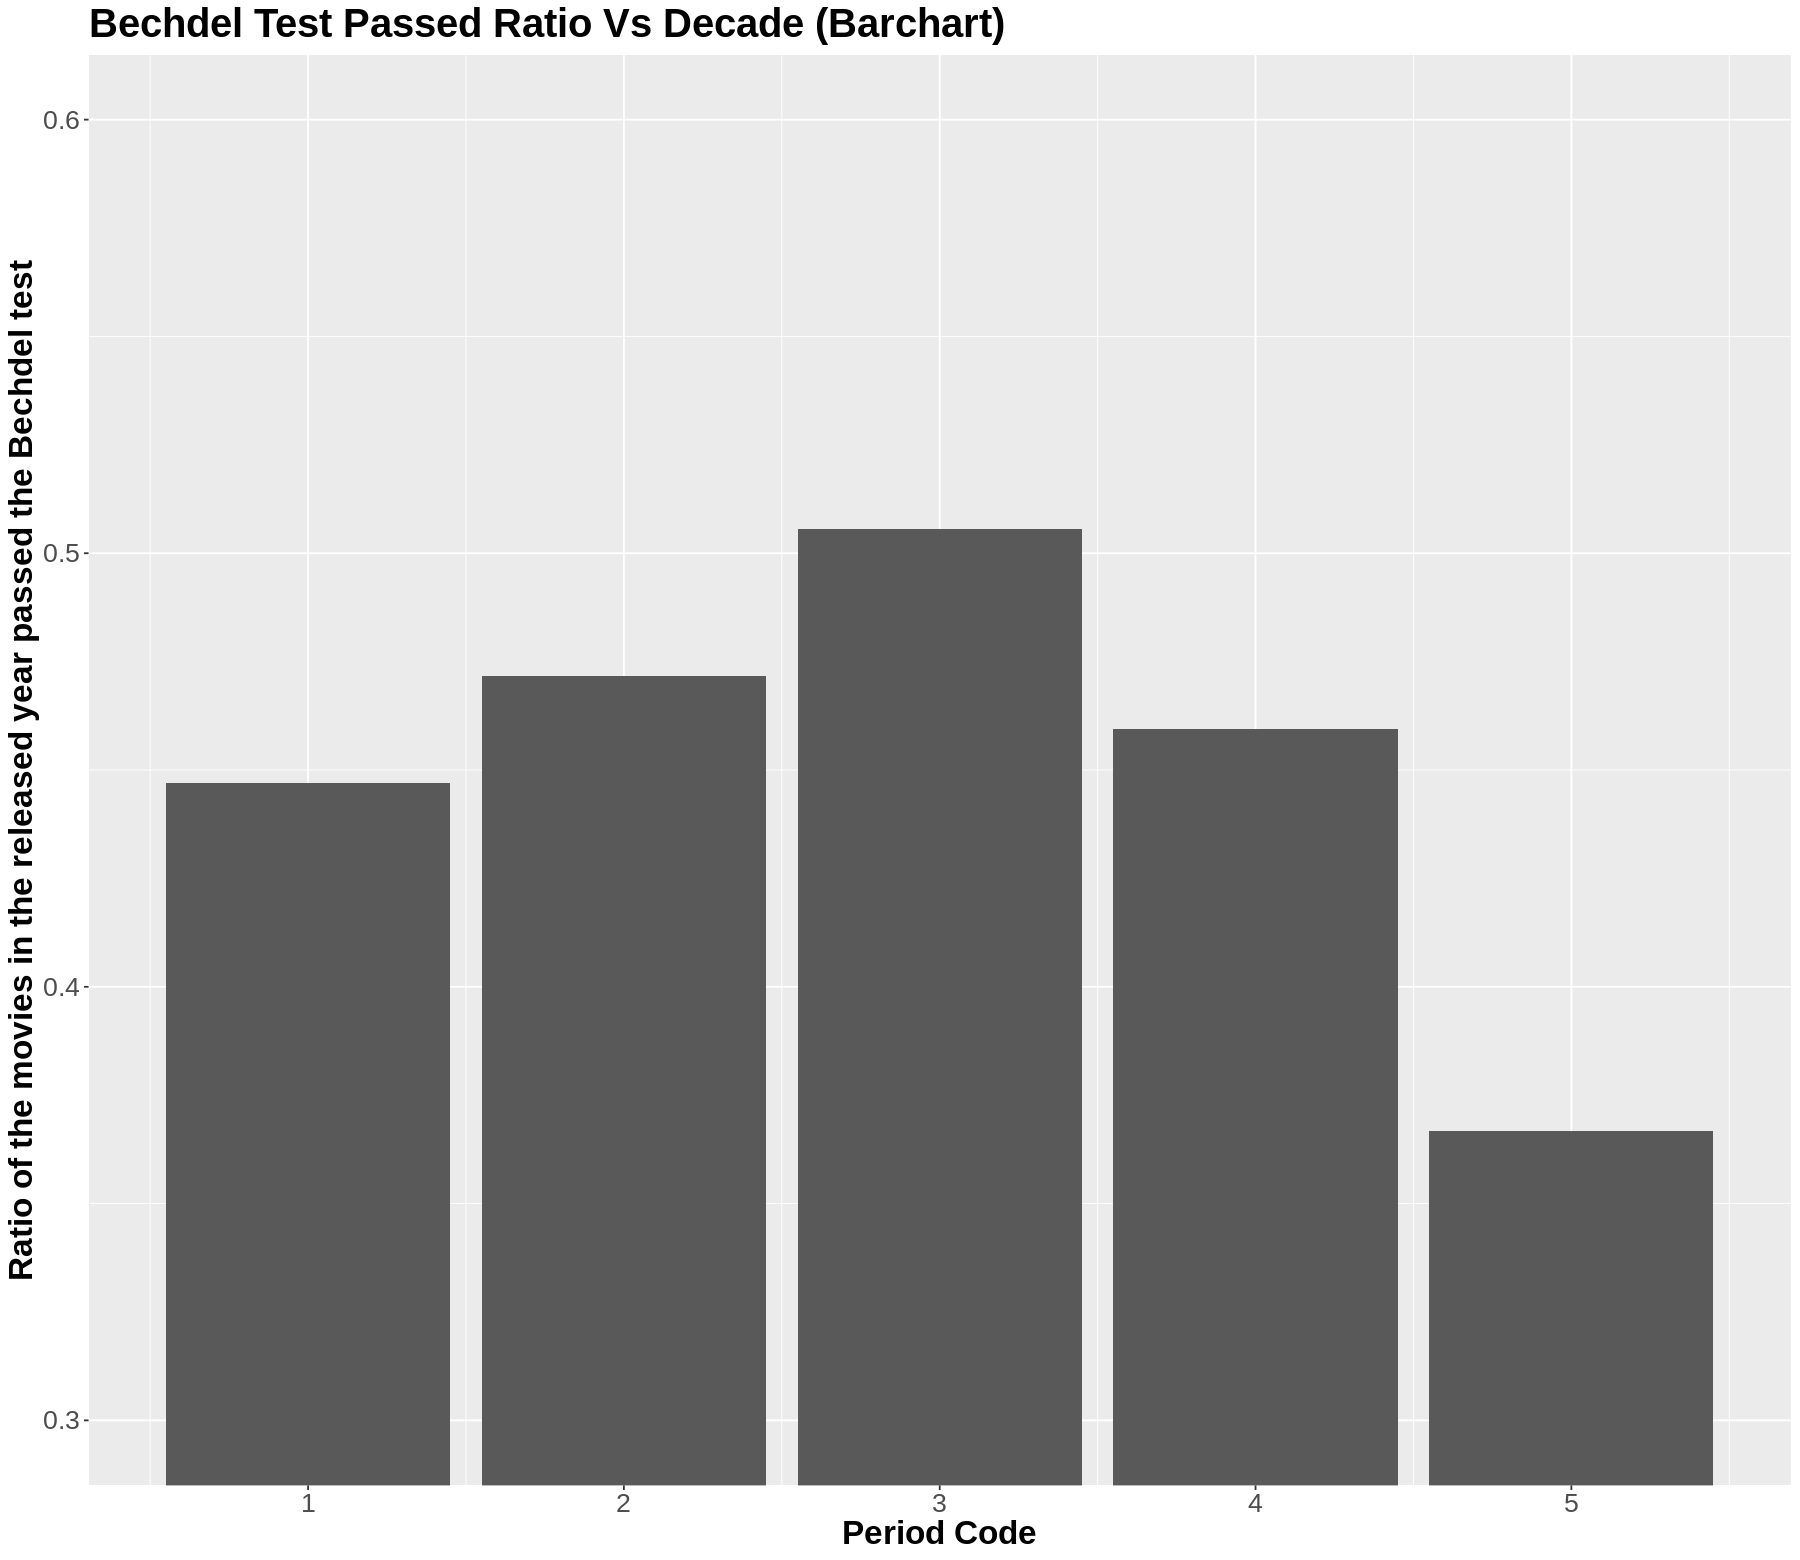

In [31]:
decaderatio <- clean_movie_data %>%
         group_by(periodCode) %>%
         summarise(success = mean(binary == "PASS"))

SLR_decade_testpass <- decaderatio %>%
              ggplot(aes(x = periodCode, y = success)) +
              geom_bar(stat="identity") +
              xlab("Period Code") +
              ylab("Ratio of the movies in the released year passed the Bechdel test") +
              ggtitle("Bechdel Test Passed Ratio Vs Decade (Barchart)") +
              coord_cartesian(ylim = c(0.3,0.6)) +
              theme(
              text = element_text(size = 20),
              plot.title = element_text(face = "bold"),
              axis.title = element_text(face = "bold")
              )
SLR_decade_testpass

EXPLAIN HOW WE CHOSOE THE THREE VARIABLES HERE BUDGET BECAUSE IT CORRELATES A LOT W GROSS INCOME, BECHDEL SINCE WE'RE INTERESTED IN WOMEN'S INVOLVEMENT EFFECT AND PERIOD CODE SINCE BECHDEL PASS RATIO CHANGE THROUGHOUT TIMEbut we will focus on the budget, the binary test and the periodCode.

### Trending Discovery

We did a simple regression just to see any prelimary issue surface. From our initial analysis, heteroscedasticity might be an issue

`geom_smooth()` using formula 'y ~ x'



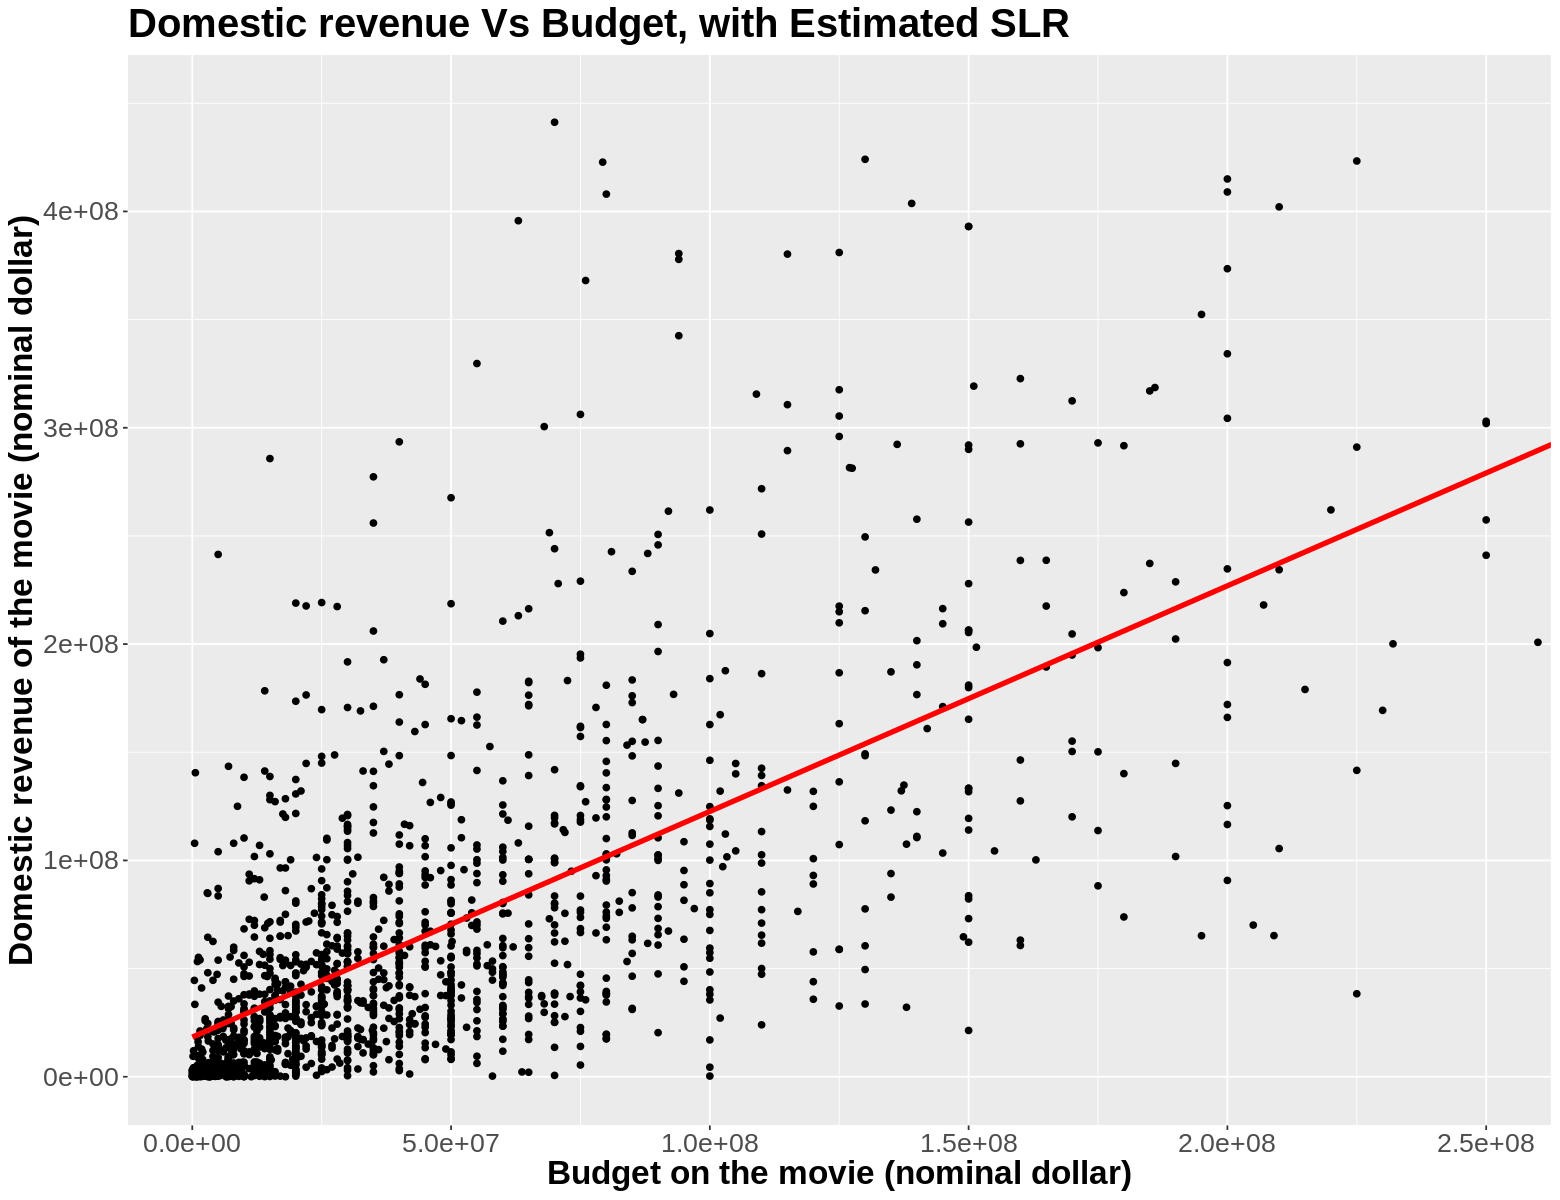

In [15]:
options(repr.plot.width = 13, repr.plot.height = 10)

SLR_budget_dom <- clean_movie_data %>%
              ggplot(aes(x = budget, y = domgross)) +
              geom_point() +
              geom_smooth(aes(x= budget, y = domgross), method = lm, se = FALSE, size = 1.5, colour = "red") +
              coord_cartesian(xlim = c(0, 2.5*10^8), ylim = c(0, 4.5*10^8)) +
              xlab("Budget on the movie (nominal dollar)") +
              ylab("Domestic revenue of the movie (nominal dollar)") +
              ggtitle("Domestic revenue Vs Budget, with Estimated SLR") +
              theme(
              text = element_text(size = 20),
              plot.title = element_text(face = "bold"),
              axis.title = element_text(face = "bold")
              )

SLR_budget_dom

*Fig 3: Domestic revenue Vs Budget*

> From the figure 1, there is a upward trending of the ratio between the budget on the movie (nominal dollar) and the domestic revenue of the movie (nominal dollar).

##### *Secondly*, the ratio of the movies successfully passed the Bechdel test for each year was computed to explore the trending of women in movies.

`geom_smooth()` using formula 'y ~ x'



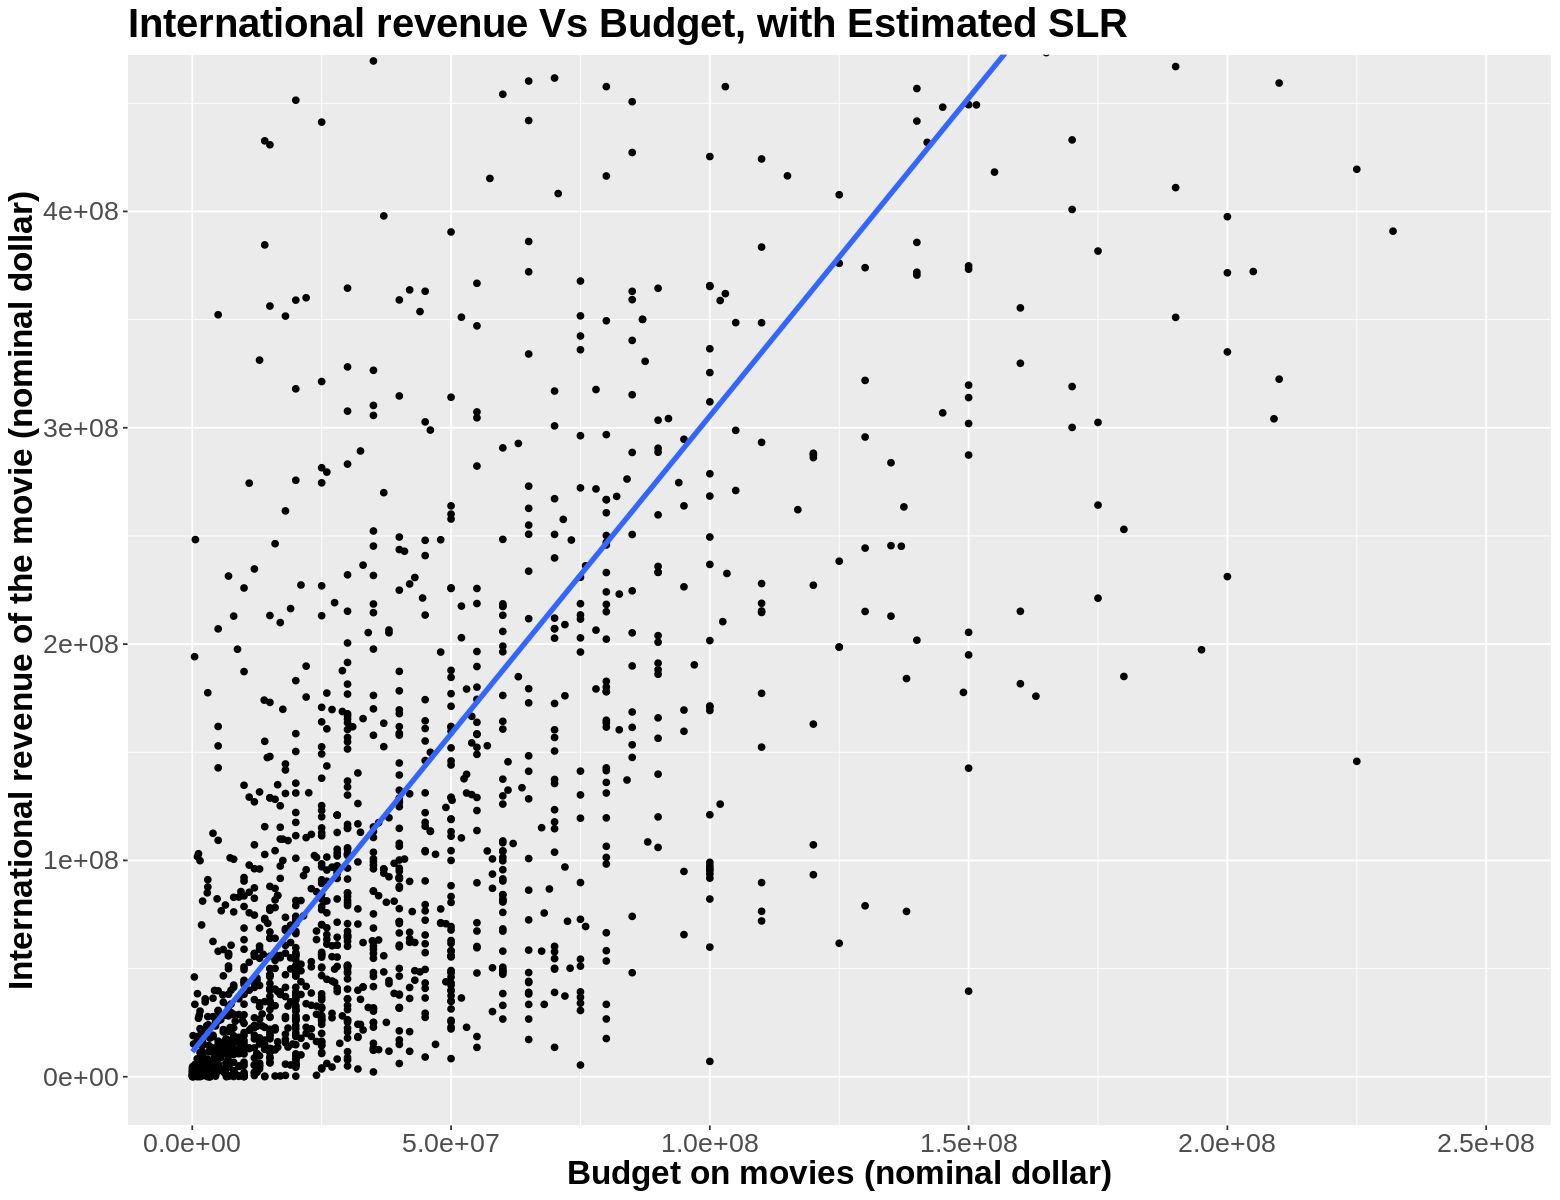

In [16]:
SLR_budget_int <- clean_movie_data %>%
              ggplot(aes(x = budget, y = intgross)) +
              geom_point() +
              geom_smooth(aes(x= budget, y = intgross), method = lm, se = FALSE, size = 1.5) +
              coord_cartesian(xlim = c(0, 2.5*10^8), ylim = c(0, 4.5*10^8)) +
              xlab("Budget on movies (nominal dollar)") +
              ylab("International revenue of the movie (nominal dollar)") +
              ggtitle("International revenue Vs Budget, with Estimated SLR") +
              theme(
              text = element_text(size = 20),
              plot.title = element_text(face = "bold"),
              axis.title = element_text(face = "bold")
              )

SLR_budget_int

*Fig 4: International revenue Vs Budget*

*Fig 5: Bechdel Test Passed Ratio Vs Period Code*

> Even though there are no apparent upward trend of the passing rate over the time (i.e. from period code = 5 to period code = 1 since the greater the period code, the older the movies are), more recent movies still have a higher precentage of passing the Bechdal test compared to the older ones.